<a href="https://www.kaggle.com/code/pranavpadmanabhan/feature-engineering-basics-1-0?scriptVersionId=186939453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset/Wine dataset.csv
/kaggle/input/covid-toys/covid_toy.csv
/kaggle/input/customer-sample/customer.csv


In [2]:
df=pd.read_csv('/kaggle/input/wine-dataset/Wine dataset.csv',usecols=[0,1,2])

In [3]:
df.head()

,class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


# Normalization Example (Min-Max Scaler)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

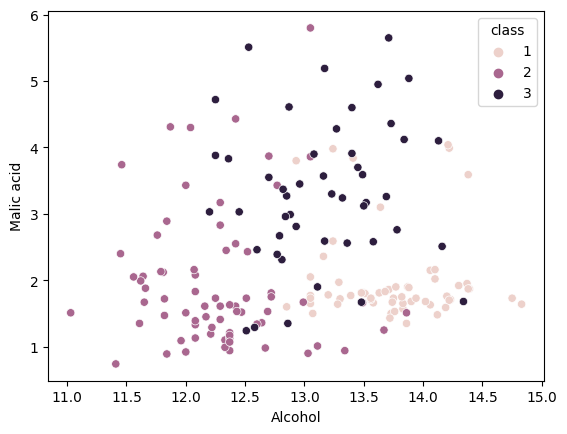

In [4]:
sns.scatterplot(data=df,x='Alcohol',y='Malic acid',hue='class')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

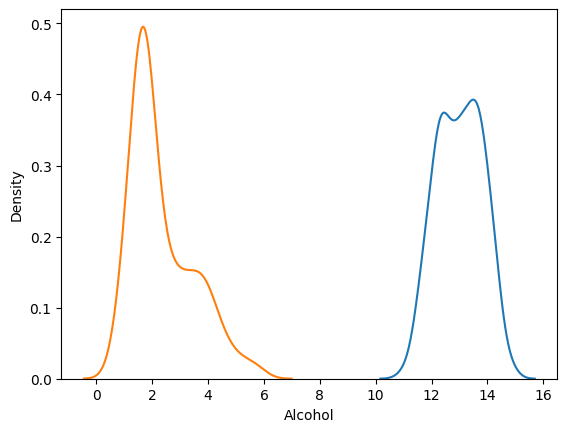

In [5]:
sns.kdeplot(df['Alcohol'])
sns.kdeplot(df['Malic acid'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop('class',axis=1),df['class'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#this is fitting the scaler to train set
scaler.fit(X_train)
#Transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
Y_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [9]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


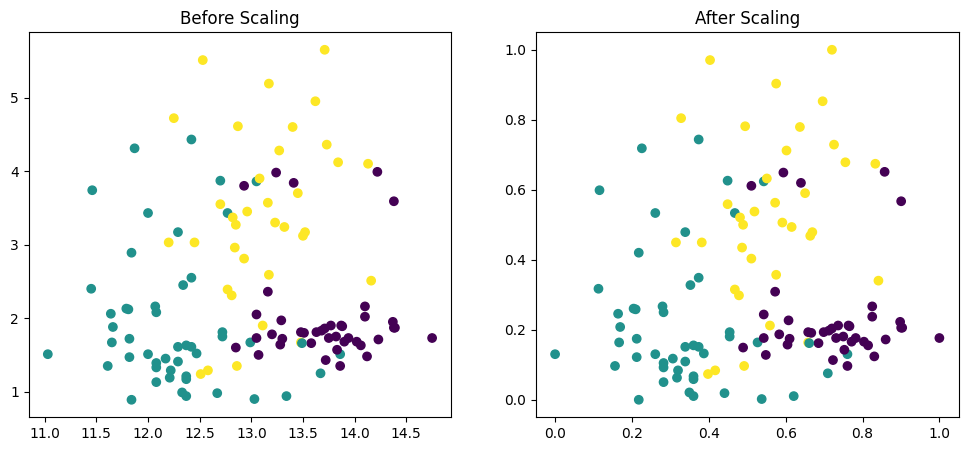

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

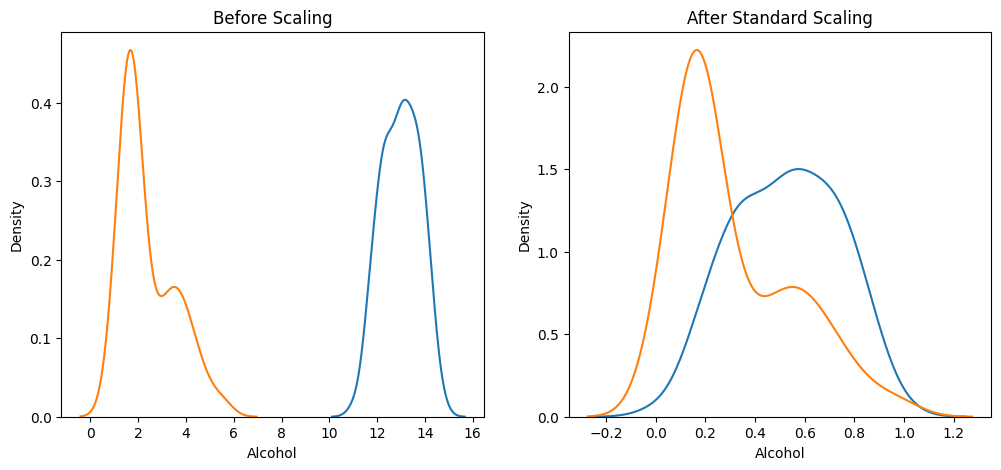

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

# Encoding Categorical Data | Ordinal Encoding

In [12]:
df1=pd.read_csv('/kaggle/input/customer-sample/customer.csv')

In [13]:
df1.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [14]:
df1=df1.iloc[:,2:]

In [15]:
df1.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df1.iloc[:,0:2],df1.iloc[:,-1],test_size=0.2)

In [17]:
X_train.head()

,review,education
11,Good,UG
41,Good,PG
14,Poor,PG
16,Poor,UG
31,Poor,School


In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
oe=OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [20]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [21]:
X_train=oe.transform(X_train)
X_test=oe.transform(X_test)

In [22]:
#After transformation
X_train

array([[2., 1.],
       [2., 2.],
       [0., 2.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 2.],
       [2., 0.],
       [1., 1.],
       [1., 2.],
       [0., 2.],
       [1., 0.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [1., 0.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [0., 2.],
       [1., 0.],
       [0., 2.],
       [2., 2.],
       [1., 2.],
       [2., 2.],
       [2., 1.],
       [2., 2.],
       [1., 0.],
       [2., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [2., 1.],
       [1., 0.],
       [1., 2.],
       [2., 1.],
       [0., 1.],
       [1., 1.],
       [2., 2.]])

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
le.fit(y_train)

LabelEncoder()

In [26]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [27]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [28]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

# Column Transformer 

In [29]:
df3=pd.read_csv('/kaggle/input/covid-toys/covid_toy.csv')

In [30]:
df3

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df3.drop(columns=['has_covid']),df3['has_covid'],test_size=0.2)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [33]:
simple_imputer = SimpleImputer()
ordinal_encoder = OrdinalEncoder(categories=[['Mild','Strong']])
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
transformer=ColumnTransformer(transformers=[
    ('tnf1',simple_imputer,['fever']),
    ('tnf2',ordinal_encoder,['cough']),
    ('tnf3',one_hot_encoder,['gender','city'])
],remainder='passthrough')

In [34]:
transformed_X_train=transformer.fit_transform(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
transformed_X_train.shape

(80, 7)

In [36]:
transformer.transform(X_test).shape

(20, 7)